In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
comp_data=pd.read_csv("Company_Data.csv")

In [3]:
comp_data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
comp_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
comp_data.duplicated().sum()



0

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
comp_data["ShelveLoc"]=label_encoder.fit_transform(comp_data["ShelveLoc"])
comp_data["Urban"]=label_encoder.fit_transform(comp_data["Urban"])
comp_data["US"]=label_encoder.fit_transform(comp_data["US"])

comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [8]:
comp_data["Sales"]=label_encoder.fit_transform(comp_data["Sales"])

In [9]:
pd.DataFrame.drop_duplicates(comp_data)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,0,42,17,1,1
1,297,111,48,16,260,83,1,65,10,1,1
2,267,113,35,10,269,80,2,59,12,1,1
3,158,117,100,4,466,97,2,55,14,1,1
4,37,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,1,33,14,1,1
396,114,139,23,3,37,120,2,55,11,0,1
397,159,162,26,12,368,159,2,40,18,1,1
398,106,100,79,7,284,95,0,50,12,1,1


In [10]:
comp_data.shape

(400, 11)

In [11]:

x=comp_data.iloc[:,0:10]
y=comp_data.iloc[:,10]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=36)

In [12]:
x_train.shape

(320, 10)

In [13]:
y_train.shape

(320,)

In [14]:
x_test.shape

(80, 10)

In [15]:
y_test.shape

(80,)

<AxesSubplot:>

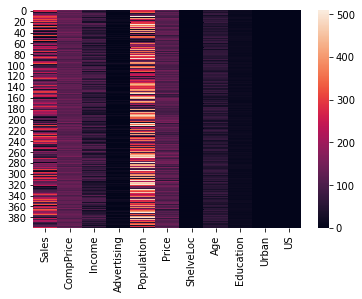

In [16]:
sns.heatmap(comp_data)

C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

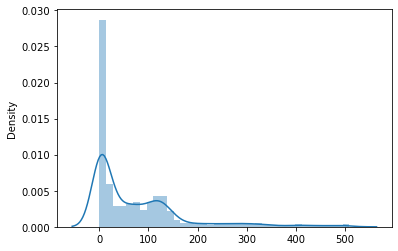

In [17]:
sns.distplot(comp_data)

In [18]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

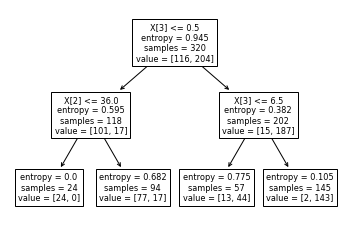

In [19]:
%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(model1);

In [20]:
pred1=model1.predict(x_test)
pred1

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
classification_report(y_test,pred1)

'              precision    recall  f1-score   support\n\n           0       0.92      0.92      0.92        26\n           1       0.96      0.96      0.96        54\n\n    accuracy                           0.95        80\n   macro avg       0.94      0.94      0.94        80\nweighted avg       0.95      0.95      0.95        80\n'

In [23]:
confusion_matrix(y_test,pred1)

array([[24,  2],
       [ 2, 52]], dtype=int64)

In [24]:
np.mean(y_test==pred1)

0.95

In [25]:
model1.score(x_test,y_test)

0.95

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.9125

In [29]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [30]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [31]:
pred2=model.predict(x_test)
np.mean(pred2==y_test)

0.8125

In [32]:
model.score(x_test,y_test)

0.14529914529914512

# Conclusion
From the above obsevations,  Decision tree Classification is giving 95% accuracy and Decision tree regression is giving 81% accuracy. Hence, we use classification to determine company data.